Recalling the introductory lecture on probability, **marginalization** is the process by which a variable is removed from a joint distribution. If $P(\{A_i\}, B)$ is the joint probability of some set of "A" events indexed with $i$, then we obtain the probability of event $B$ by marginalizing over the A events. This amounts to summing.

\begin{align}
P(B) = \sum_i P(\{A_i\}, B).
\end{align}

This also works for probability density functions. If $f(x_1, x_2)$ is the joint probability density function for $x_1$ and $x_2$, then

\begin{align}
f(x_1) = \int\mathrm{d}x_2\,f(x_1, x_2).
\end{align}

Imagine we have three variables, $x_1$, $x_2$, and $x_3$ that are distributed according to a trivariate Normal.

\begin{align}
x_1, x_2, x_3 \sim \text{Norm}(\boldsymbol{\mu}, \mathsf{\Sigma}),
\end{align}

where $\boldsymbol{\mu} = (\mu_1, \mu_2, \mu_3)^\mathsf{T}$ is the trivariate location parameter and

\begin{align}
\mathsf{\Sigma} = \begin{pmatrix}
\Sigma_{11} & \Sigma_{12} & \Sigma_{13} \\
\Sigma_{12} & \Sigma_{22} & \Sigma_{23} \\
\Sigma_{13} & \Sigma_{23} & \Sigma_{33}
\end{pmatrix}
\end{align}

is the symmetric positive definite scale parameter, called a **covariance matrix**.

If we want to know the joint distribution of $x_1, x_3$, we can do it the "hard" way by directly computing the integral

\begin{align}
f(x_1, x_3) = \int\mathrm{d}x_2\,f(x_1, x_2, x_3).
\end{align}

You can perform this integration if you like (but you don't have to). You would find that

\begin{align}
x_1, x_3 \sim \text{Norm}\left(\begin{pmatrix}\mu_1, \mu_3\end{pmatrix}, \begin{pmatrix}
\Sigma_{11} & \Sigma_{13} \\
\Sigma_{13} & \Sigma_{33}
\end{pmatrix}\right).
\end{align}

The marginal distribution is Normal again, just with the marginalized variable removed. This is true for a multivariate Normal distribution, but is not generally true. Similarly, if we want the distribution for $x_1$, we can marginalize out $x_3$.

\begin{align}
f(x_1) = \int\mathrm{d}x_2\int\mathrm{d}x_3\,f(x_1, x_2, x_3).
\end{align}

The result is

\begin{align}
x_1 \sim \text{Norm}(\mu_1, \Sigma_{11}),
\end{align}

though we usually write this in terms of a standard deviation and not variance, where $\sigma_1^2 = \Sigma_{11}$.

It takes some mathematical grunge to arrive at these results, but we can get a similar result by sampling. Specifically, **if you can get samples out of a multivariate distribution, you get samples out of a marginalized distribution by simply ignoring the samples of the variables you are marginalizing out.** We will use this fact over and over (and over and over) again in the next term of the class. You will demonstrate it to yourself for the case of the trivariate Normal in this problem.

**a)** Draw 2,000 samples for $\mathbf{x} = (x_1, x_2, x_3)$ out of a trivariate Normal distribution. You can refer to the [Distribution Explorer](https://distribution-explorer.github.io/multivariate_continuous/multivariate_normal.html) for direction on how to do that. For your choice of parameters, use

\begin{align}
&\boldsymbol{\mu} = (10, 15, 25)^\mathsf{T},\\[1em]
&\mathsf{\Sigma} = \begin{pmatrix}
6 & -7 & -5 \\
-7 & 13 & 11 \\
-5 & 11 & 10
\end{pmatrix}.
\end{align}

**b)** Plot the samples of $x_1$ as an ECDF. Overlay the CDF of the theoretical distribution for $f(x_1)$. Do they match?

<!-- **c)** Plot the samples of $x_1$ and $x_3$ together. Overlay a contour plot of the theoretical joint PDF $f(x_1, x_3)$. You can use the `bebi103.viz.contour()` function if you like. Do these match up? -->

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import pandas as pd
from scipy.stats import multivariate_normal
import iqplot

import bokeh.io
bokeh.io.output_notebook()

from pylab import *


Loading BokehJS ...

In [59]:
x1 = np.linspace(0, 20, 2000, endpoint=False)
x2 = np.linspace(0, 30, 2000, endpoint=False)
x3 = np.linspace(0, 50, 2000, endpoint=False)
mu=[10, 15, 25]
Sigma=[[6, -7, -5],[-7, 13, 11], [-5, 11, 10]]
#y1 = multivariate_normal.pdf(x1, mean=10, cov=6); 
#y2=(multivariate_normal.pdf(x2, mean=15, cov=13)); 
#y3=(multivariate_normal.pdf(x3, mean=25, cov=10)); 
y1,y2,y3=np.random.multivariate_normal(mu, Sigma, 2000).T
#df=pd.DataFrame(data=y1 , columns=['x1'])
#df

<AxesSubplot:>

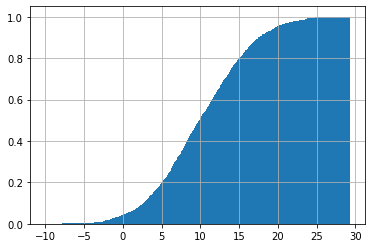

In [77]:
y_single=np.random.normal(10, 6, 2000)


# sort the data:
y_single_sorted = np.sort(y_single)

# calculate the proportional values of samples
p_single = 1. * np.arange(len(y_single)) / (len(y_single) - 1)


df=pd.DataFrame(data=y_single , columns=['x1 single'])
df['x1']=y1
p = iqplot.ecdf(
    data=df,
    q='x1',
    style='staircase'
)

bokeh.io.show(p)


df['x1 single'].hist(cumulative=True, density=1, bins=1000)



# they are the same 